In [52]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
list = [{'a': 'dfha', 'b':78887},
        {'a': 'dkjfh', 'b':767}]
df = pd.DataFrame(list)
df

,a,b
0,dfha,78887
1,dkjfh,767


In [3]:
l = [{'position':'python', 'money': '25k-40k'},
     {'position': 'c++/python', 'money': '20k-40k·13薪'},
     {'position': 'python开发工程师', 'money': '15k-30k'}]

In [4]:
df = pd.DataFrame(l)
df

,position,money
0,python,25k-40k
1,c++/python,20k-40k·13薪
2,python开发工程师,15k-30k


In [5]:
money_mins = []
money_maxs = []
for one_record in df['money']:
    if '薪' in one_record:
        months = int(one_record.split('·')[1].strip('薪'))
        money_list = one_record.split('-')
        money_min = int(money_list[0].strip('k')) * (months / 12)
        money_max = int(money_list[1].split('·')[0].strip('k')) * (months / 12)
        money_mins.append(round(money_min, 1))
        money_maxs.append(round(money_max, 1))
    else:
        money_list = one_record.split('-')
        money_min = int(money_list[0].strip('k'))
        money_max = int(money_list[1].strip('k'))
        money_mins.append(money_min)
        money_maxs.append(money_max)
    print(money_mins, money_maxs)

[25] [40]
[25, 21.7] [40, 43.3]
[25, 21.7, 15] [40, 43.3, 30]


In [6]:
df['money_min'] = money_mins
df['money_max'] = money_maxs

In [7]:
df

,position,money,money_min,money_max
0,python,25k-40k,25.0,40.0
1,c++/python,20k-40k·13薪,21.7,43.3
2,python开发工程师,15k-30k,15.0,30.0


In [8]:
df['money_min'].mean()

20.566666666666666

In [12]:
money_min_mean = df['money_min'].mean()
money_max_mean = df['money_max'].mean()
result = {'guangzhou': {'money_min_mean': money_min_mean,
                    'money_max_mean': money_max_mean}}
result

{'guangzhou': {'money_min_mean': 20.566666666666666,
  'money_max_mean': 37.766666666666666}}

In [48]:
dict_list = [{'beijing': {'money_min_mean': 17.844, 'money_max_mean': 30.92533333333334}}, {'guangzhou': {'money_min_mean': 11.321212121212122, 'money_max_mean': 19.84090909090909}}, {'shanghai': {'money_min_mean': 15.27733333333333, 'money_max_mean': 27.104}}, {'shenzhen': {'money_min_mean': 13.715999999999998, 'money_max_mean': 23.43733333333333}}]

In [49]:
dict_list

[{'beijing': {'money_min_mean': 17.844, 'money_max_mean': 30.92533333333334}},
 {'guangzhou': {'money_min_mean': 11.321212121212122,
   'money_max_mean': 19.84090909090909}},
 {'shanghai': {'money_min_mean': 15.27733333333333, 'money_max_mean': 27.104}},
 {'shenzhen': {'money_min_mean': 13.715999999999998,
   'money_max_mean': 23.43733333333333}}]

In [25]:
dict_list

index = []
data = []
for d in dict_list:
    for key , value in d.items():
        index.append(key)
        data.append(value)
data

In [47]:
df = pd.DataFrame(data, index=index)
df

,money_min_mean,money_max_mean
beijing,17.844000,30.925333
guangzhou,11.321212,19.840909
shanghai,15.277333,27.104000
shenzhen,13.716000,23.437333


/Users/yannlee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


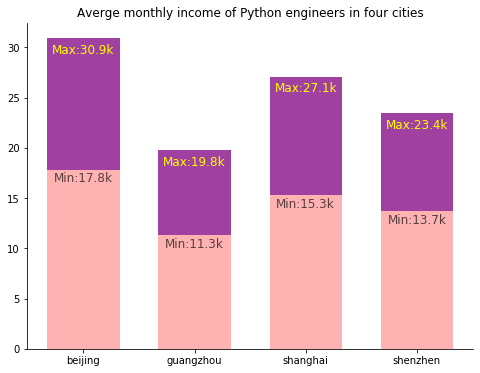

In [121]:
fig = plt.figure(figsize=(8,6))
#绘直方图：
rects_min = plt.bar(df.index, 
                    df['money_min_mean'], 
                    width=0.65, 
                    color='red',
                    alpha=0.3)
rects_max = plt.bar(df.index, 
                    df['money_max_mean']-df['money_min_mean'], 
                    bottom=df['money_min_mean'],
                    width=0.65,
                    color='purple',
                    alpha=0.75)

#文本标注：
for rect in rects_min:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2, 
             height-1.5, 
             f'Min:{round(height, 1)}k',
             ha='center',
             va='bottom',
             color='black',
             alpha=0.65,
             size=12)

count = 0
for rect in rects_max:
    height = round(df['money_max_mean'][count], 1)
    count += 1
    plt.text(rect.get_x()+rect.get_width()/2,
             height-1.5,
             f'Max:{height}k',
             ha='center',
             color='yellow',
             size=12)
#设置标题：
plt.title('Averge monthly income of Python engineers in four cities')

ax = plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show();

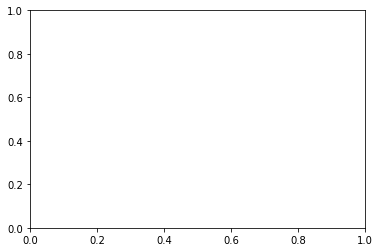

In [120]:
ax = plt.axes()

In [ ]:
ax.spines()

In [61]:
idn[i for i in df.index]

['beijing', 'guangzhou', 'shanghai', 'shenzhen']

In [53]:
len(df)

4

In [91]:
df['money_max_mean'][0]

30.92533333333334

In [117]:
#测试无效url在requests.get()时的反馈
import requests

In [119]:
url = 'https://www.lagou.com/guangzhou-zhaopin/Python/6'
resp = requests.get(url, timeout=0.3)
resp.text

'\n<!DOCTYPE html>\n<html lang="en">\n<head>\n\t<meta charset="UTF-8">\n\t<title>Document</title>\n\t<style>\n\t\t* {\n\t\t\tmargin: 0;\n\t\t\tpadding: 0;\n\t\t}\n\t\tbody {\n\t\t\tfont-family: "Hiragino Sans GB", "Microsoft Yahei", "SimSun", Arial, "Helvetica Neue", Helvetica;\n\t\t\tbackground: #f8f9fc;\t\t\t\n\t\t}\n\t\t.i_error {\n\t\t\tposition: relative;\n\t\t\t/*width: 654px;*/\n\t\t\twidth: 34.0625%;\n\t\t\t/*height: 467px;*/\n\t\t\tmargin: 67px auto 0;\t\n\t\t\t/*background: url(/lagouhtml/blocked_404.png) 0 0 no-repeat;*/\n\t\t}\n\t\t.i_logo {\n\t\t\tposition: absolute;\n\t\t\t/*top: 116px;*/\n\t\t\ttop: 24.8394%;\n\t\t\t/*left: 68px;*/\n\t\t\tleft: 9.785933%;\n\t\t\t/*width: 110px;*/\n\t\t\twidth: 16.819572%;\n\t\t\t/*height: 41px;*/\n\t\t\t/*background: url(/lagouhtml/lagou_logo.png) 0 0 no-repeat;*/\n\t\t}\n\t\t.tip {\n\t\t\tmargin-top: 49px;\n\t\t\tfont-size: 20px;\n\t\t\tline-height: 20px;\n\t\t\ttext-align: center;\n\t\t\tcolor: #333;\n\t\t}\n\t\t.msg {\n\t\t\tmargin-to